### Notes and References
None yet.




In [1]:

#@markdown ###First Cell 
#@markdown *Please paste this cell into any colab notebook for this project.* <br>
#@markdown ***
#@markdown **Contents**: Temporary notebook to hold raw viz while the full workflow notebook is just not working for me.<br>
#@markdown ***
#@markdown Major Edit History: 
#@markdown - John McCloskey, May 27: Created as copy of Old Notebook (`Set Filtering Options - JoWilder.ipynb`).
#@markdown ***
#@markdown <br> 
#@markdown Please change `FIELDDAY_DIR` if it is located differently in your drive. This cell will error if `FIELDDAY_DIR` is incorrect.
# mount drive
from google.colab import drive
drive.mount('/content/drive')

# Change working directory
import os
FIELDDAY_DIR = '/content/drive/My Drive/Field Day' #@param {type:"string"}
INCLUDE_DIR = '/content/drive/My Drive/Field Day/Research and Writing Projects/OGDUtils' #@param (type:"string")
PROJECT_DIR = os.path.join(FIELDDAY_DIR,'Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill')
JUPYTER_DIR = os.path.join(PROJECT_DIR,'Colab/Notebooks')
os.chdir(JUPYTER_DIR)
print(f'---\nCWD: {os.getcwd()}')

#@markdown Change pandas `max_rows` and `max_columns`
import pandas as pd
pd.options.display.max_columns = 100 #@param {type:"integer"}
#pd.options.display.max_columns = 1000
pd.options.display.max_rows = 60 #@param {type:"integer"}

#@markdown *Note: There may be other variables to manually change. Look the "Set Variables" section.*

# import utils
import sys
sys.path.append('.')
sys.path.append(INCLUDE_DIR)
import utils

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
---
CWD: /content/drive/My Drive/Field Day/Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill/Colab/Notebooks


In [2]:
os.chdir(INCLUDE_DIR)
!pwd
!git pull

/content/drive/My Drive/Field Day/Research and Writing Projects/OGDUtils
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 3), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/fielddaylab/OGDUtils
   4cc330a..b9b542d  master     -> origin/master
Updating 4cc330a..b9b542d
Fast-forward
 jowilder_utils.py | 151 +++++++++++++++++++++++++++++++++++++++++++++++++++++-
 1 file changed, 150 insertions(+), 1 deletion(-)


### Imports

In [0]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
import feature_utils as feat_util
import urllib.request
from google.colab import files
from io import BytesIO
from math import ceil
from matplotlib import pyplot as plt
from scipy import stats
from zipfile import ZipFile
import importlib
importlib.reload(feat_util)

<module 'feature_utils' from '/content/drive/My Drive/Field Day/Research and Writing Projects/OGDUtils/feature_utils.py'>

### Set Vars

In [0]:
options = None#feat_util.options.lakeland_player_lvl0
print(*str(options).split(','), sep='\n')

None


### Get Data

In [0]:
LogDF, import_meta = feat_util.getZippedLogDFbyURL(['https://opengamedata.fielddaylab.wisc.edu/data/JOWILDER/JOWILDER_20200401_to_20200430_ad4c5fa_proc.zip'])
print(*import_meta,sep='\n')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (419,420,435,437,438,439,452,453,454) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Import from fhttps://opengamedata.fielddaylab.wisc.edu/data/JOWILDER/JOWILDER_20200401_to_20200430_ad4c5fa_proc.zip


In [0]:
print(LogDF.shape)
LogDF.head()

(28520, 2917)


,Q0_A1,Q0_A1_time,Q0_A2,Q0_A2_time,Q0_A3,Q0_A3_time,Q0_answers,Q0_num_guesses,Q10_A1,Q10_A1_time,Q10_A2,Q10_A2_time,Q10_A3,Q10_A3_time,Q10_answers,Q10_num_guesses,Q11_A1,Q11_A1_time,Q11_A2,Q11_A2_time,Q11_A3,Q11_A3_time,Q11_answers,Q11_num_guesses,Q12_A1,Q12_A1_time,Q12_A2,Q12_A2_time,Q12_A3,Q12_A3_time,Q12_answers,Q12_num_guesses,Q13_A1,Q13_A1_time,Q13_A2,Q13_A2_time,Q13_A3,Q13_A3_time,Q13_answers,Q13_num_guesses,Q14_A1,Q14_A1_time,Q14_A2,Q14_A2_time,Q14_A3,Q14_A3_time,Q14_answers,Q14_num_guesses,Q15_A1,Q15_A1_time,...,obj79_ocount_notebook_uses,obj79_omeaningful_action_count,obj79_onext_int,obj79_onum_enc,obj79_otime_to_next_obj,obj7_ocount_clicks,obj7_ocount_notebook_uses,obj7_omeaningful_action_count,obj7_onext_int,obj7_onum_enc,obj7_otime_to_next_obj,obj8_ocount_clicks,obj8_ocount_notebook_uses,obj8_omeaningful_action_count,obj8_onext_int,obj8_onum_enc,obj8_otime_to_next_obj,obj9_ocount_clicks,obj9_ocount_notebook_uses,obj9_omeaningful_action_count,obj9_onext_int,obj9_onum_enc,obj9_otime_to_next_obj,persistentSessionID,play_day,play_hour,play_minute,play_month,play_second,play_year,save_code,sessDuration,sess_EventCount,sess_avg_time_between_clicks,sess_count_clicks,sess_count_hovers,sess_count_notebook_uses,sess_end_obj,sess_first_enc_avg_tbps,sess_first_enc_avg_wps,sess_first_enc_boxes_read,sess_first_enc_duration,sess_first_enc_var_tbps,sess_first_enc_var_wps,sess_first_enc_words_read,sess_meaningful_action_count,sess_num_enc,sess_start_obj,start_level,sessionID
sessionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20020216324789588,D,7.300,D,8.548,C,5.633,DDCB,4.0,F,19.633,I,2.717,P,4.417,FIPI,4.0,F,4.132,NaN,NaN,NaN,NaN,F,1.0,H,3.45,NaN,NaN,NaN,NaN,H,1.0,O,9.383,H,21.0,I,2.466,OHIKJLMOPQN,11.0,Z,14.733,NaN,NaN,NaN,NaN,Z,1.0,d,10.699,...,NaN,NaN,NaN,NaN,43.375,13.0,1.0,2.0,8.0,1.0,25.765,18.0,0.0,0.0,103.0,4.0,57.379,14.0,0.0,0.0,105.0,4.0,40.482,20020216324789588,31,23,33,3,42,2020,0,6187.602,2612,3.807197,1625,893,43,79,8.010439,61.304742,646,2311.192,3148.696734,342663.044746,3928,241,162,0,0,20020216324789588
20020321323011480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20020321323011480,26,1,33,3,24,2020,0,79.447,37,3.835100,20,14,0,1,17.163670,102.977204,13,47.802,1414.595793,69033.070399,55,5,7,0,0,20020321323011480
20030000045530932,B,3.433,NaN,NaN,NaN,NaN,B,1.0,E,6.856,NaN,NaN,NaN,NaN,E,1.0,N,10.479,P,2.541,H,10.127,NPHIF,5.0,H,4.48,NaN,NaN,NaN,NaN,H,1.0,N,10.935,NaN,NaN,NaN,NaN,N,1.0,Y,12.146,Z,8.144,NaN,NaN,YZ,2.0,d,8.871,...,NaN,NaN,NaN,NaN,97.041,17.0,0.0,2.0,8.0,1.0,14.032,10.0,0.0,0.0,9.0,1.0,5.066,14.0,0.0,0.0,105.0,4.0,14.635,20030000043962520,26,4,5,4,17,2020,0,2033.173,1973,1.447004,1367,520,9,79,4.250527,25.958911,615,729.867,40.097799,2399.500002,3692,212,133,0,0,20030000045530932
20030000095939772,C,32.185,D,32.646,B,5.776,CDB,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.0,1.0,2.0,8.0,1.0,33.182,45.0,0.0,0.0,103.0,3.0,74.499,27.0,0.0,0.0,104.0,5.0,56.494,20030623572916856,19,5,11,4,11,2020,0,565.839,610,1.238160,457,90,6,11,10.568345,96.316091,85,132.669,2989.233771,306460.870833,553,36,24,0,0,20030000095939772
20030000391230116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20030000043962520,26,4,39,4,28,2020,0,49.222,98,0.449640,89,5,1,79,4.293395,24.206963,25,12.855,0.814711,201.881304,143,1,2

In [0]:
LogDF[[ 'R0_quiz_response',
 'R1_quiz_response',
 'R2_quiz_response',]].replace(-1, np.NaN).astype('category').describe()

,R0_quiz_response,R1_quiz_response,R2_quiz_response
count,16507.0,16095.0,15885.0
unique,2.0,3.0,4.0
top,0.0,2.0,0.0
freq,14455.0,10973.0,8504.0


### Filter

In [0]:
if options and options.filter_args is not None:
    filtered_df, filter_meta = feat_util.filter_df(LogDF, **options.filter_args)
else:
    queries = ["R0_quiz_response != -1", "R1_quiz_response != -1", "R2_quiz_response != -1",'sessDuration < 3600 ','sessDuration > 0 ','start_level==0']
    filtered_df, filter_meta = feat_util.filter_df(LogDF, query_list=queries, verbose=False, fillna=0)

print(*filter_meta,sep='\n')
filtered_df

*arg* filter_args = {'fillna': 0, 'one_query': False, 'query_list': ['R0_quiz_response != -1', 'R1_quiz_response != -1', 'R2_quiz_response != -1', 'sessDuration < 3600 ', 'sessDuration > 0 ', 'start_level==0'], 'verbose': False}
Query: Intial Shape, output_shape: (28520, 2917)
Query: R0_quiz_response != -1, output_shape: (16507, 2917)
Query: R1_quiz_response != -1, output_shape: (15934, 2917)
Query: R2_quiz_response != -1, output_shape: (15662, 2917)
Query: sessDuration < 3600 , output_shape: (14234, 2917)
Query: sessDuration > 0 , output_shape: (14030, 2917)
Query: start_level==0, output_shape: (14010, 2917)
Filled NaN with 0


,Q0_A1,Q0_A1_time,Q0_A2,Q0_A2_time,Q0_A3,Q0_A3_time,Q0_answers,Q0_num_guesses,Q10_A1,Q10_A1_time,Q10_A2,Q10_A2_time,Q10_A3,Q10_A3_time,Q10_answers,Q10_num_guesses,Q11_A1,Q11_A1_time,Q11_A2,Q11_A2_time,Q11_A3,Q11_A3_time,Q11_answers,Q11_num_guesses,Q12_A1,Q12_A1_time,Q12_A2,Q12_A2_time,Q12_A3,Q12_A3_time,Q12_answers,Q12_num_guesses,Q13_A1,Q13_A1_time,Q13_A2,Q13_A2_time,Q13_A3,Q13_A3_time,Q13_answers,Q13_num_guesses,Q14_A1,Q14_A1_time,Q14_A2,Q14_A2_time,Q14_A3,Q14_A3_time,Q14_answers,Q14_num_guesses,Q15_A1,Q15_A1_time,...,obj79_ocount_notebook_uses,obj79_omeaningful_action_count,obj79_onext_int,obj79_onum_enc,obj79_otime_to_next_obj,obj7_ocount_clicks,obj7_ocount_notebook_uses,obj7_omeaningful_action_count,obj7_onext_int,obj7_onum_enc,obj7_otime_to_next_obj,obj8_ocount_clicks,obj8_ocount_notebook_uses,obj8_omeaningful_action_count,obj8_onext_int,obj8_onum_enc,obj8_otime_to_next_obj,obj9_ocount_clicks,obj9_ocount_notebook_uses,obj9_omeaningful_action_count,obj9_onext_int,obj9_onum_enc,obj9_otime_to_next_obj,persistentSessionID,play_day,play_hour,play_minute,play_month,play_second,play_year,save_code,sessDuration,sess_EventCount,sess_avg_time_between_clicks,sess_count_clicks,sess_count_hovers,sess_count_notebook_uses,sess_end_obj,sess_first_enc_avg_tbps,sess_first_enc_avg_wps,sess_first_enc_boxes_read,sess_first_enc_duration,sess_first_enc_var_tbps,sess_first_enc_var_wps,sess_first_enc_words_read,sess_meaningful_action_count,sess_num_enc,sess_start_obj,start_level,sessionID
sessionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20020321323011480,0,0.000,0,0.000,0,0.000,0,0.0,0,0.000,0,0.000,0,0.0,0,0.0,0,0.000,0,0.0,0,0.0,0,0.0,0,0.000,0,0.000,0,0.0,0,0.0,0,0.000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,20020321323011480,26,1,33,3,24,2020,0,79.447,37,3.835100,20,14,0,1,17.163670,102.977204,13,47.802,1414.595793,69033.070399,55,5,7,0,0,20020321323011480
20030000095939772,C,32.185,D,32.646,B,5.776,CDB,3.0,0,0.000,0,0.000,0,0.0,0,0.0,0,0.000,0,0.0,0,0.0,0,0.0,0,0.000,0,0.000,0,0.0,0,0.0,0,0.000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,21.0,1.0,2.0,8.0,1.0,33.182,45.0,0.0,0.0,103.0,3.0,74.499,27.0,0.0,0.0,104.0,5.0,56.494,20030623572916856,19,5,11,4,11,2020,0,565.839,610,1.238160,457,90,6,11,10.568345,96.316091,85,132.669,2989.233771,306460.870833,553,36,24,0,0,20030000095939772
20030001275028492,C,11.989,B,2.061,0,0.000,CB,2.0,0,0.000,0,0.000,0,0.0,0,0.0,0,0.000,0,0.0,0,0.0,0,0.0,0,0.000,0,0.000,0,0.0,0,0.0,0,0.000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,0.0,3.0,8.0,1.0,14.400,11.0,0.0,0.0,103.0,2.0,19.935,9.0,0.0,0.0,108.0,3.0,7.831,20030001275028492,19,8,28,4,22,2020,0,418.453,451,1.283598,326,118,1,18,4.219914,22.751751,140,160.480,107.552584,2754.286847,846,58,36,0,0,20030001275028492
20030001322418816,0,0.000,0,0.000,0,0.000,0,0.0,0,0.000,0,0.000,0,0.0,0,0.0,0,0.000,0,0.0,0,0.0,0,0.0,0,0.000,0,0.000,0,0.0,0,0.0,0,0.000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,20030001322418816,19,5,32,4,58,2020,0,422.734,193,3.154731,134,57,1,5,4.341330,25.613596,55,169.825,52.468236,1032.944688,337,32,16,0,0,20030001322418816
20030002244443972,0,0.000,0,0.000,0,0.000,0,0.0,0,0.000,0,0.000,0,0.0,0,0.0,0,0.000,0,0.0,0,0.0,0,0.0,0,0.000,0,0.000,0,0.0,0,0.0,0,0.000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,20030002244443972,11,18,25,4,52,2020,0,287.359,147,2.000134,142,0,6,5,11.411196,92.099089,45,110.565,485.136235,57536.343650,282,14,7,0,0,20030002244443972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [0]:
def group_by_func(df, func, title='', show=True):
    r0_groups = {0: 'native',1:'nonnative'}
    r1_groups = {0: 'not very good skill', 1: 'okay skill', 2: 'very good skill'}
    r2_groups = {0: 'really enjoy', 1: 'enjoy', 2: 'okay', 3: 'not enjoy'}
    group_string = lambda r0,r1,r2: ', '.join([r0_groups[r0],r1_groups[r1],r2_groups[r2]])
    result_dfs = [pd.DataFrame(index=r1_groups.values(),columns=r2_groups.values()),pd.DataFrame(index=r1_groups.values(),columns=r2_groups.values())]
    if show:
        print(f'{"-"*6}  {title}  {"-"*6}')
    for r0 in [0,1]:
        subtitle = "Nonnatives" if r0 else "Natives"
        if show:
            print(f'\n{subtitle}:')
        tdf0 = df.query(f"R0_quiz_response == {r0}")
        for r1 in [0,1,2]:
            tdf1 = tdf0.query(f"R1_quiz_response == {r1}")
            for r2 in [0,1,2,3]:
                tdf2 = tdf1.query(f"R2_quiz_response == {r2}")
                result_dfs[r0].loc[r1_groups[r1],r2_groups[r2]] = df_func(tdf2)
        if show:
            display(result_dfs[r0])
    return result_dfs
df_func = lambda df: (round(df['sess_first_enc_avg_wps'].mean()),round(df['sess_first_enc_avg_wps'].std()))
title = 'avg wps, std wps'
group_by_func(filtered_df, df_func, title);

------  avg wps, std wps  ------

Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(36, 42)","(35, 31)","(41, 42)","(39, 45)"
okay skill,"(41, 39)","(40, 52)","(37, 33)","(44, 59)"
very good skill,"(44, 51)","(45, 50)","(40, 37)","(33, 22)"



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,"(38, 40)","(25, 16)","(33, 20)","(33, 30)"
okay skill,"(41, 55)","(40, 41)","(42, 49)","(24, 19)"
very good skill,"(43, 42)","(43, 37)","(40, 32)","(34, 19)"


Natives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,210,154,186,198
okay skill,676,1039,1007,136
very good skill,5906,1864,758,141



Nonnatives:


,really enjoy,enjoy,okay,not enjoy
not very good skill,35,29,70,191
okay skill,114,160,192,44
very good skill,561,194,95,50


In [0]:
result_dfs[1]

,really enjoy,enjoy,okay,not enjoy
not very good skill,35,29,70,191
okay skill,114,160,192,44
very good skill,561,194,95,50


In [0]:
from IPython.display import HTML
tdf = result_dfs[1]
print(tdf.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>really enjoy</th>
      <th>enjoy</th>
      <th>okay</th>
      <th>not enjoy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>not very good skill</th>
      <td>(38, 40)</td>
      <td>(25, 16)</td>
      <td>(33, 20)</td>
      <td>(33, 30)</td>
    </tr>
    <tr>
      <th>okay skill</th>
      <td>(41, 55)</td>
      <td>(40, 41)</td>
      <td>(42, 49)</td>
      <td>(24, 19)</td>
    </tr>
    <tr>
      <th>very good skill</th>
      <td>(43, 42)</td>
      <td>(43, 37)</td>
      <td>(40, 32)</td>
      <td>(34, 19)</td>
    </tr>
  </tbody>
</table>



sessDuration
EFL_yes_no
R0_quiz_response # chose 0: 12275 (88%). Avg 943.9982201221987, std 911.4218309665213.
R0_quiz_response # chose 1: 1735 (12%). Avg 870.0829798270898, std 892.59939120563.
skill_low_med_high
R1_quiz_response # chose 0: 1073 (8%). Avg 757.5890074557308, std 832.5618416887525.
R1_quiz_response # chose 1: 3368 (24%). Avg 841.3925570071261, std 876.4491392698458.
R1_quiz_response # chose 2: 9569 (68%). Avg 987.6130196467801, std 923.8617132037078.
enjoy_high_med_low_none
R2_quiz_response # chose 0: 7502 (54%). Avg 978.7381595574557, std 922.3281791669224.
R2_quiz_response # chose 1: 3440 (25%). Avg 923.4062906976721, std 906.0183158350956.
R2_quiz_response # chose 2: 2308 (16%). Avg 855.3005753899479, std 870.9068159073207.
R2_quiz_response # chose 3: 760 (5%). Avg 794.9040539473688, std 879.826130925576.

max_level
EFL_yes_no
R0_quiz_response # chose 0: 12275 (88%). Avg 8.301995926680245, std 8.10466756838225.
R0_quiz_response # chose 1: 1735 (12%). Avg 7.423631123

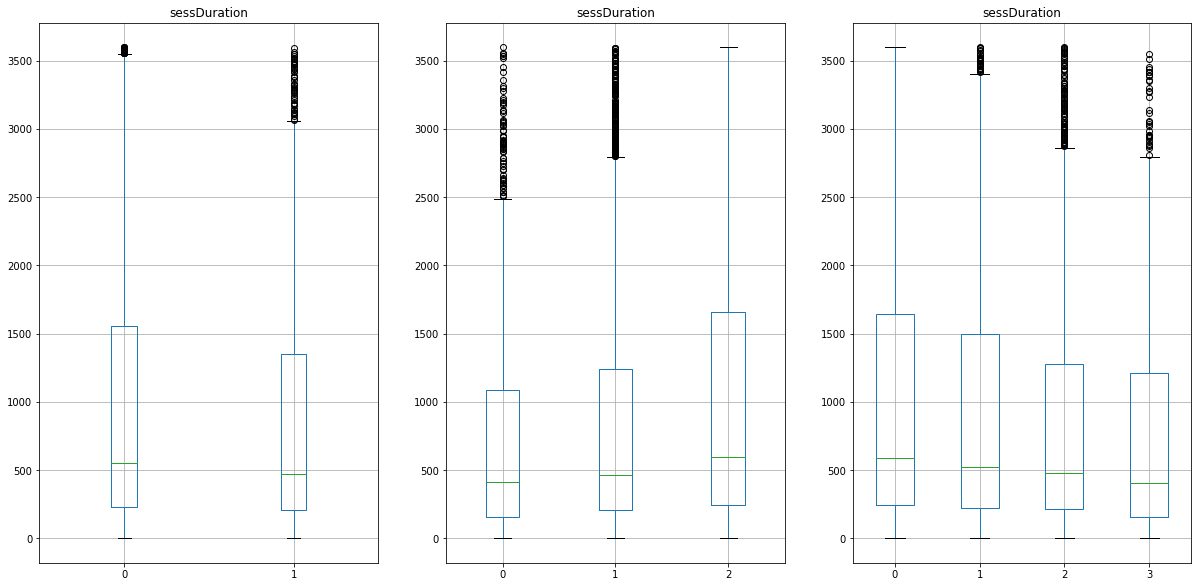

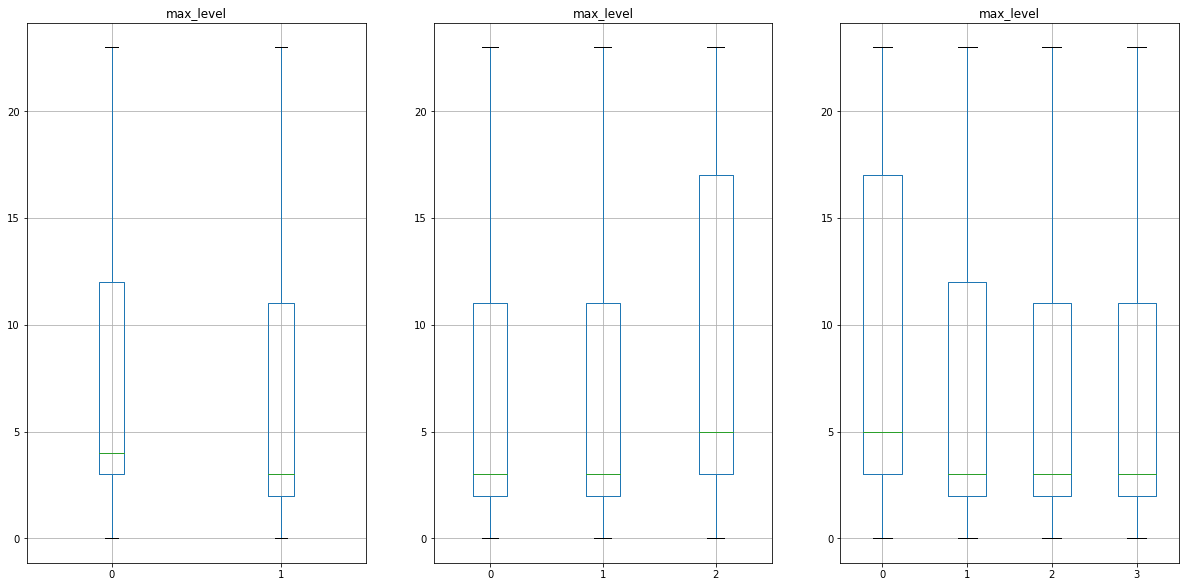

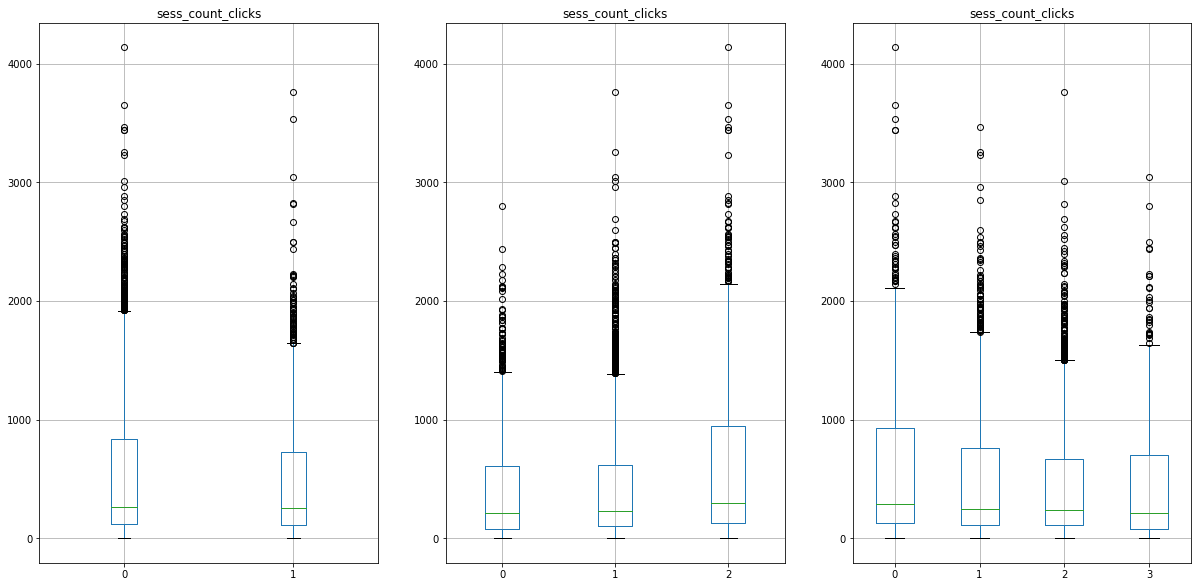

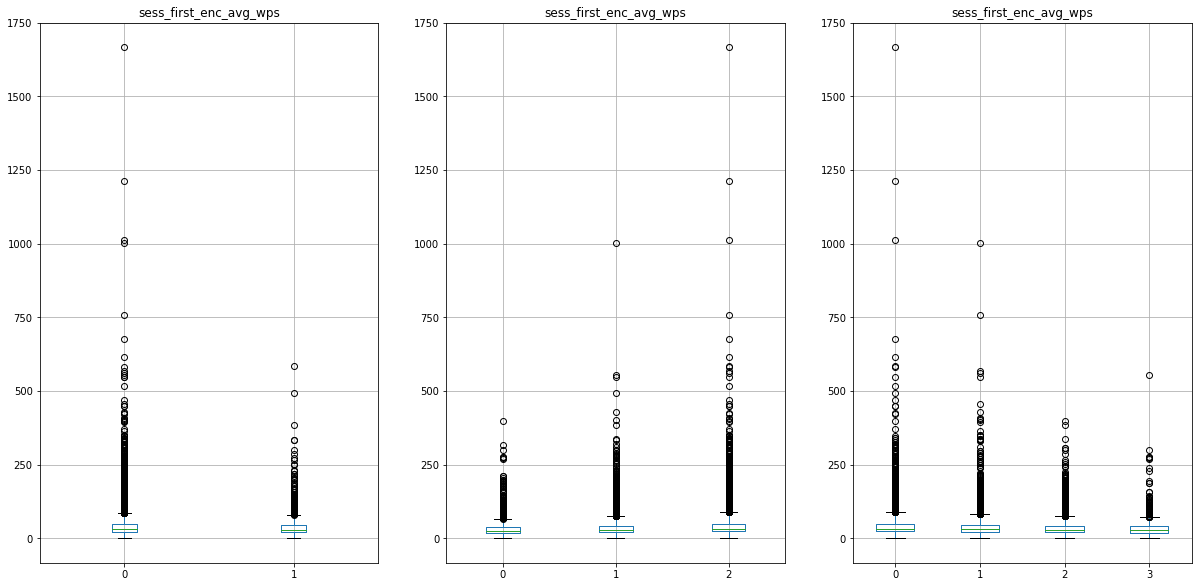

In [0]:

def response_boxplot(df, category, verbose=False):
    print('\n'+category)
    fig, axs = plt.subplots(1,3,figsize=(20,10))
    qs = ['EFL_yes_no', 'skill_low_med_high', 'enjoy_high_med_low_none']
    for i,f in enumerate([ 'R0_quiz_response','R1_quiz_response','R2_quiz_response',]):
        if verbose:
            print(qs[i])
        bp = df.boxplot(column=category, by=df[f].astype('category'), ax=axs[i])
        bp.set_xlabel('')
        for choice in range(df[f].min(), df[f].max()+1):
            query= f"{f}=={choice}"
            cat_df = df.query(query)[category]
            num_chose = len(cat_df)
            mean = cat_df.mean()
            std = cat_df.std()
            if verbose:
                print(f'{f} # chose {choice}: {num_chose} ({round(num_chose/len(df)*100)}%). Avg {mean}, std {std}.')
    plt.suptitle('')
    fig.show()
for cat in ['sessDuration', 'max_level', 'sess_count_clicks','sess_first_enc_avg_wps']:
    response_boxplot(filtered_df, cat, verbose=True)

Only Full Session Students

sessDuration
EFL_yes_no
R0_quiz_response # chose 0: 1857 (90%). Avg 2280.00989606893, std 613.1569874173155.
R0_quiz_response # chose 1: 216 (10%). Avg 2309.152421296296, std 642.7663857253875.
skill_low_med_high
R1_quiz_response # chose 0: 88 (4%). Avg 2223.0620795454556, std 684.3101819350675.
R1_quiz_response # chose 1: 325 (16%). Avg 2391.3921876923087, std 670.201373725215.
R1_quiz_response # chose 2: 1660 (80%). Avg 2265.014081927711, std 599.2927591261749.
enjoy_high_med_low_none
R2_quiz_response # chose 0: 1271 (61%). Avg 2264.0274020456336, std 607.3319135653841.
R2_quiz_response # chose 1: 492 (24%). Avg 2307.079333333333, std 614.0916521492003.
R2_quiz_response # chose 2: 239 (12%). Avg 2343.0977907949773, std 662.4707512755585.
R2_quiz_response # chose 3: 71 (3%). Avg 2254.831943661971, std 621.7558866611763.

max_level
EFL_yes_no
R0_quiz_response # chose 0: 1857 (90%). Avg 23.0, std 0.0.
R0_quiz_response # chose 1: 216 (10%). Avg 23.0, std 0.0.


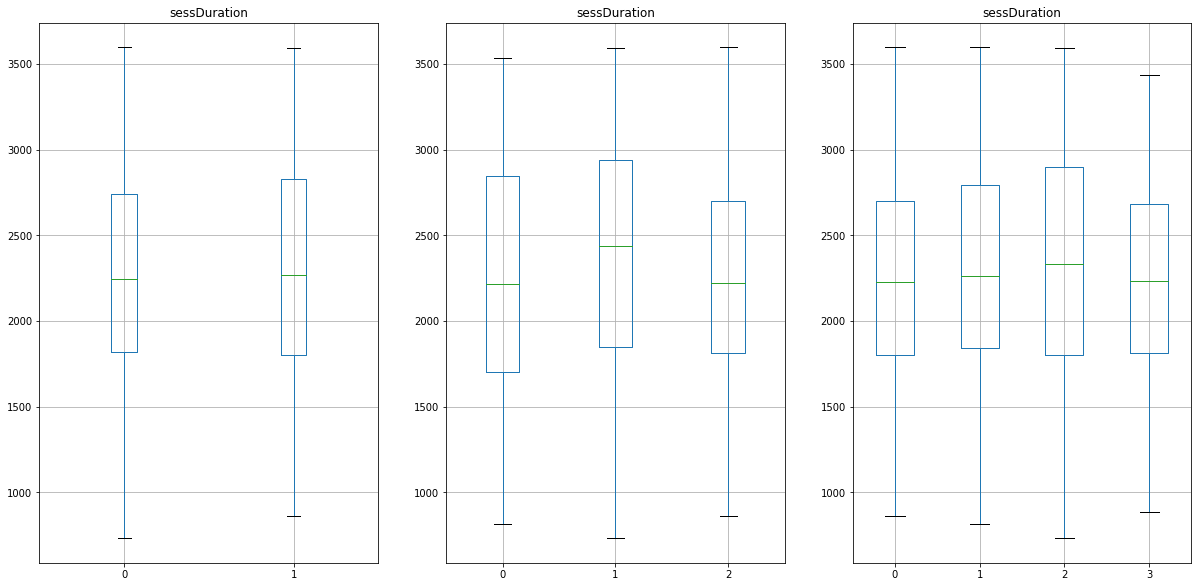

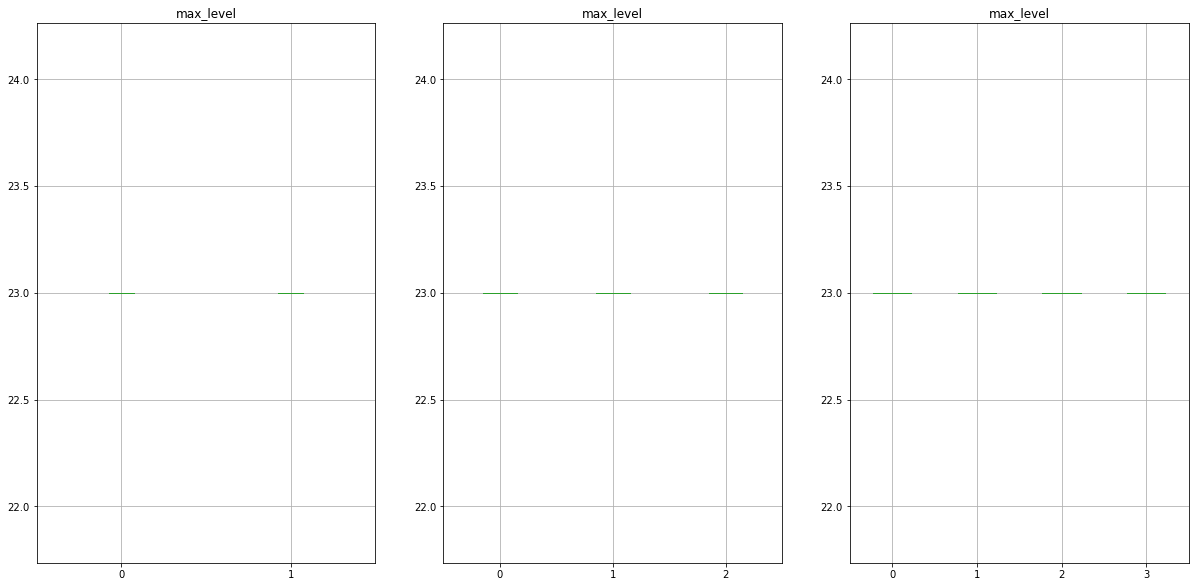

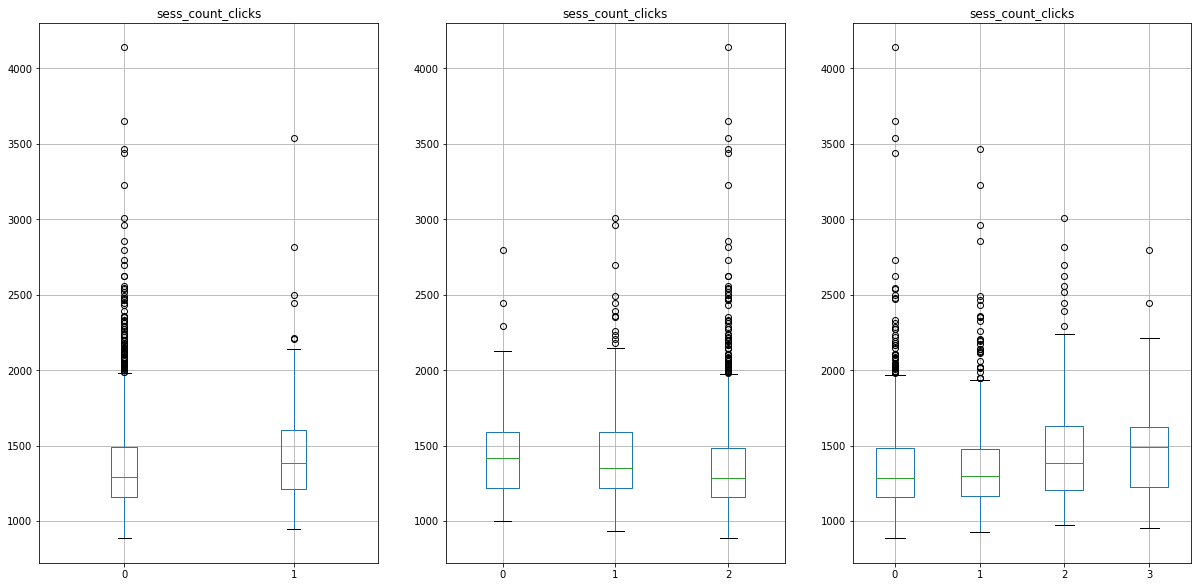

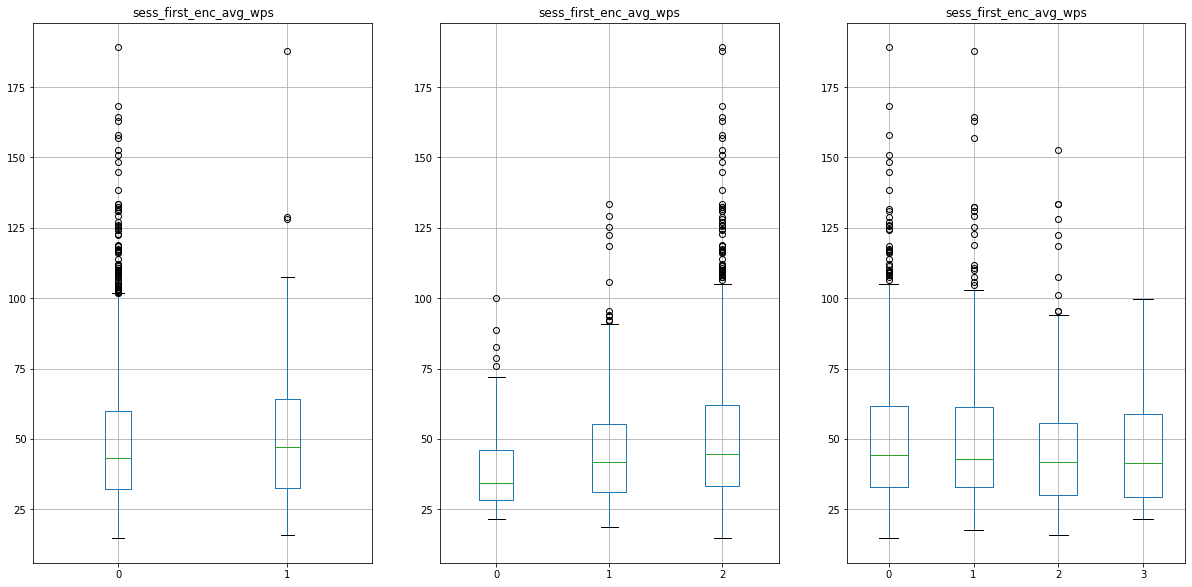

In [0]:
print('Only Full Session Students')
full_sess_df = filtered_df.query('max_level==23')
for cat in ['sessDuration', 'max_level', 'sess_count_clicks','sess_first_enc_avg_wps']:
    response_boxplot(full_sess_df, cat, verbose=True)

In [0]:
tdict = {
                "sess_count_clicks": "Number of clicks throughout the game",
            "sess_count_hovers": "Number of hovers throughout the game",
			"sess_meaningful_action_count": "number of navigation clicks on items/objects/people/portholes + number of clicks on map locations",
            "sess_EventCount": "count of all log events in the game",
			"sess_count_notebook_uses": "number of times the player opened the notebook over the whole game",
			"sess_avg_time_between_clicks": "average time between clicks",
			"sess_first_enc_words_read": "sum words read in every first encounter",
			"sess_first_enc_boxes_read": "boxes read in every first encounter",
			"sess_num_enc": "number of encounters",
			"sess_first_enc_duration": "duration of first encounters",
			"sess_first_enc_avg_wps": "average words per second in each first encounter",
			"sess_first_enc_var_wps": "variance words per second in each first encounter",
			"sess_first_enc_avg_tbps": "average text boxes per second in each first encounter",
			"sess_first_enc_var_tbps": "variance text boxes per second in each first encounter",
          "sess_start_obj": "objective the player started with",
          "sess_end_obj": "objective the player ended with",

			"start_level": "Level the player started at",
			"max_level":"Highest level reached in the session",
			"sessDuration": "Length of the session",
}

In [0]:
list(tdict.keys())

['sess_count_clicks',
 'sess_count_hovers',
 'sess_meaningful_action_count',
 'sess_EventCount',
 'sess_count_notebook_uses',
 'sess_avg_time_between_clicks',
 'sess_first_enc_words_read',
 'sess_first_enc_boxes_read',
 'sess_num_enc',
 'sess_first_enc_duration',
 'sess_first_enc_avg_wps',
 'sess_first_enc_var_wps',
 'sess_first_enc_avg_tbps',
 'sess_first_enc_var_tbps',
 'sess_start_obj',
 'sess_end_obj',
 'start_level',
 'max_level',
 'sessDuration']

In [0]:
np.isnan(pd)

<NA>